# **EDA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

! pip install sweetviz
import sweetviz as sv
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


     |████████████████████████████████| 15.1 MB 4.4 MB/s 


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

FileNotFoundError: ignored

In [3]:
print(f'Train data size: {train.shape[0]}')
print(f'Test data size: {test.shape[0]}')
print(f'Number of features: {train.shape[1] - 1}') # -1 for the target SalePrice

Train data size: 1460


NameError: ignored

## Missing values
On the next cells we can see the types of variables and number of none.

Overall we can see that there are missing values in a lot of features and we might want to complete them to be able to use them for prediction.

We need to understand wheather the none values are result of not existing feature (for example none values on poolQC are because there isn't pool)

In [4]:
missing = train.isna().sum(axis=0)
missing = missing[missing>0]
missing_list = missing.index.to_numpy()

print(f'Features with missing values: \n\n{missing_list}')

Features with missing values: 

['LotFrontage' 'MasVnrType' 'MasVnrArea' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Electrical' 'FireplaceQu'
 'GarageType' 'GarageYrBlt' 'GarageFinish' 'GarageQual' 'GarageCond'
 'PoolQC' 'Fence']


In [5]:
missing.sort_values(ascending=False)

PoolQC          1453
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageFinish      81
GarageYrBlt       81
GarageType        81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

## Histograms and properties of each variable

In [7]:
report = sv.analyze(train, target_feat='SalePrice')


                                             |          | [  0%]   00:00 -> (? left)

In [8]:
report.show_notebook()

Output hidden; open in https://colab.research.google.com to view.

From this analys we can see the histograms of all the variables.
For each categorial variable we can see the percent of each category. In some of the cases there is one category that it's the most common one. There are cases where the most common category represent also the houses with high prices and there are other cases that a category that it's not the majority one has an high house price. for example: in HouseStyle the most common category is "1story" but there are high house prices when style is "2story".

## Difference categorial and quantitative variables


In [ ]:
train_quantitative = train.loc[:, train.dtypes[train.dtypes != object].index]
train_categorical = train.loc[:, train.dtypes[train.dtypes == object].index]


In [ ]:
print("Quantitative variables:")
print('\n'.join(train_quantitative.columns))

Quantitative variables:
Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


In [ ]:
print("Categorical variables")
print('\n'.join(train_categorical.columns))

Categorical variables
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
SaleType
SaleCondition


In [ ]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


As we can see most of the continues variables doesnt have null values.
There are variables with high variance.

There are some variables that represent features that not necessary exist in all the samples for example the square feet of a basement in the proper.
Those features has a diffrent behavior, the 25%, 50% and sometimes the 75% might have 0 value, that's probably because there are not alot of properties that those elements exist in them.

## Correlations

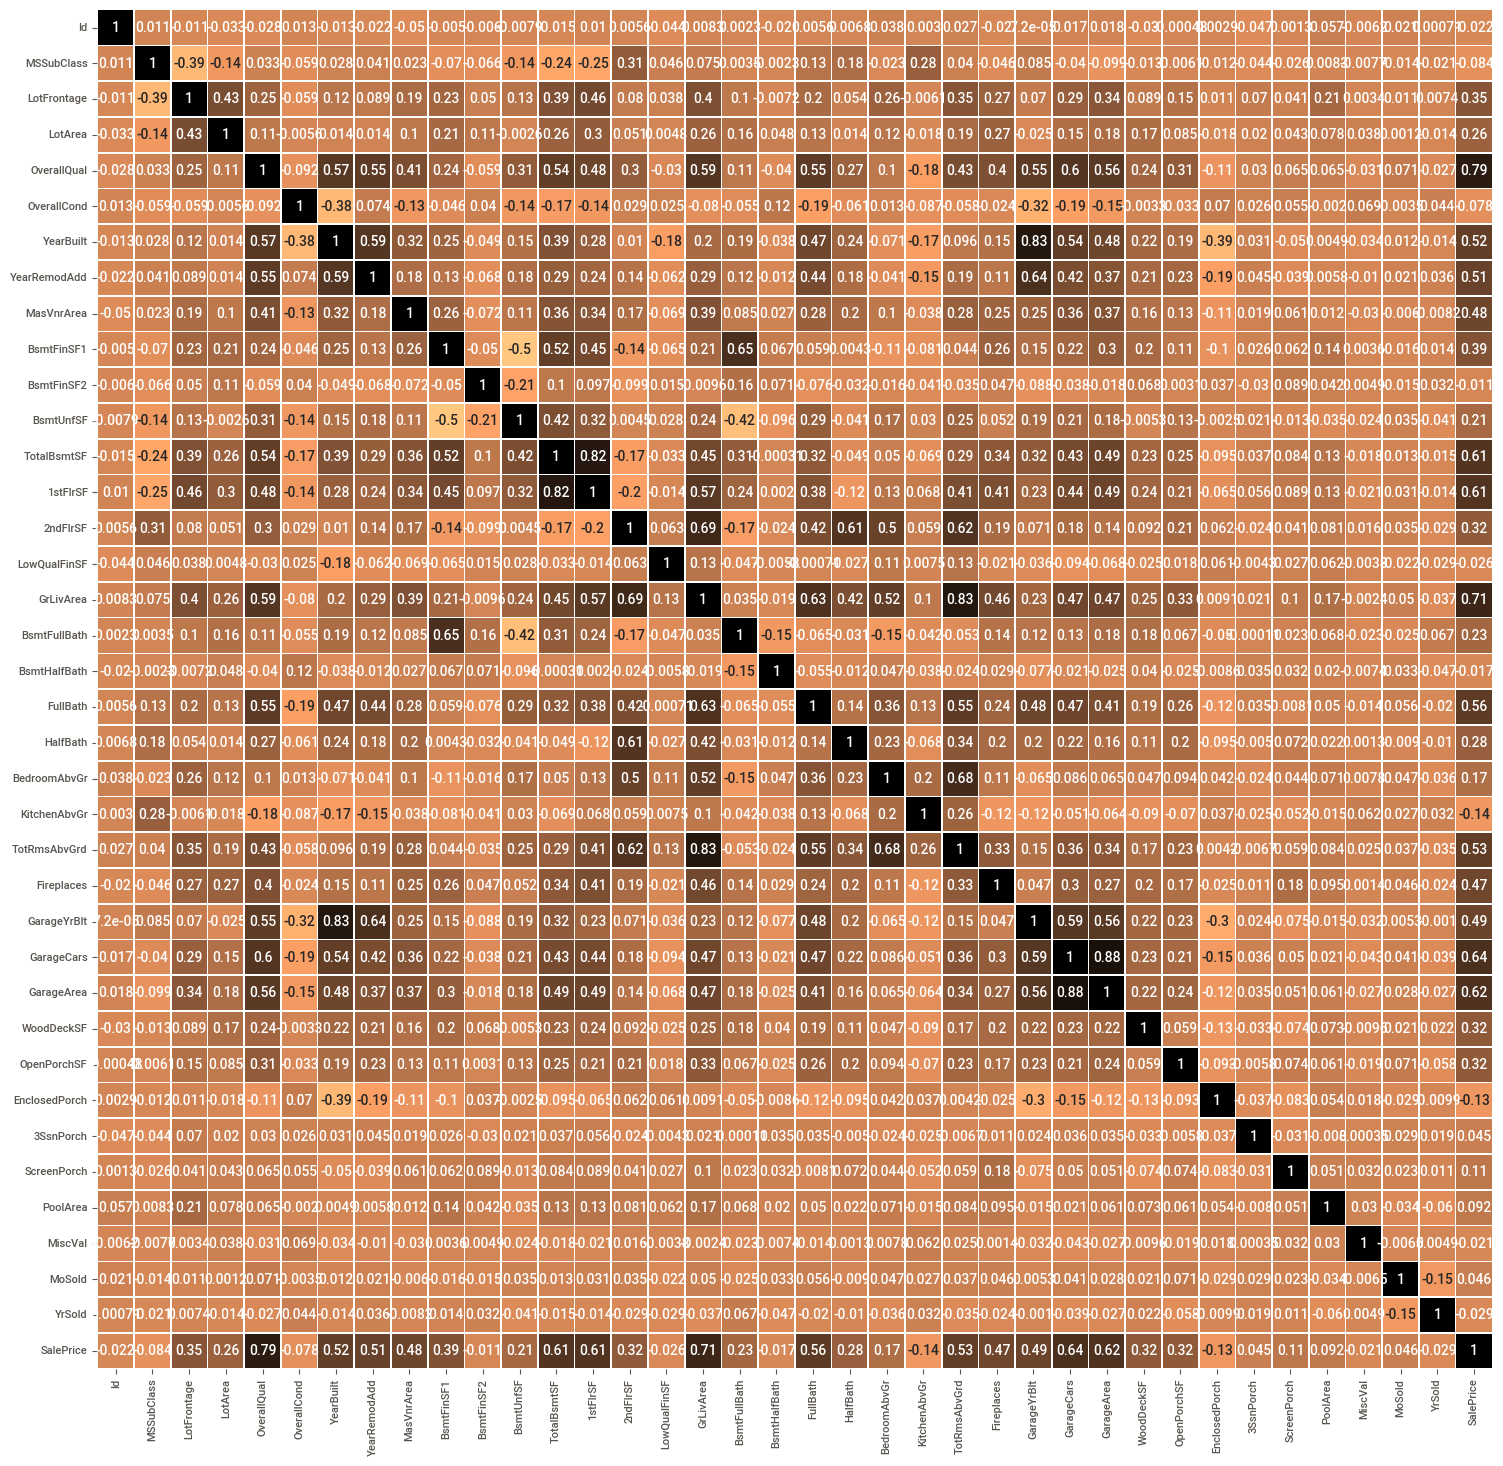

In [ ]:

fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(train_quantitative.corr(), annot=True, linewidths=.5, ax=ax, cbar=False, cmap=plt.cm.copper_r)
plt.show()

We wanted to see the correlation between the quantitative variables for 2 reasons:
- check if there are variables with high correlation (negative/positive), the meaning of those correlations is that the 2 features acts in a similar way and we might consider to use one of them to reduce number of features.
- check which features are hight correlated with our Y

from the heat map we can see that there are some features with high correlation between them, and some features that are highly correlated with Y that might help us to predict Y

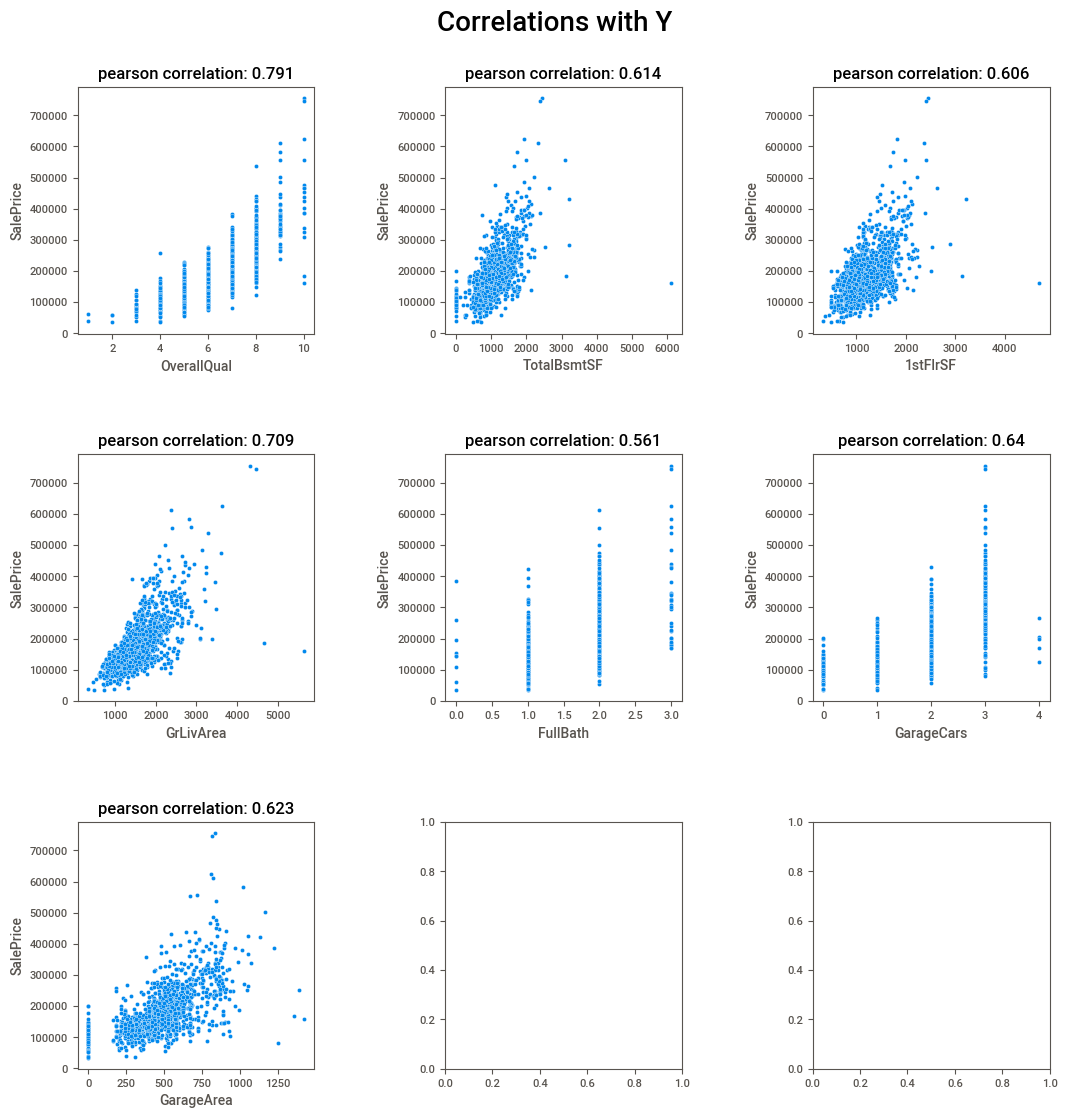

In [ ]:
corr = train.corr()
positive_correlated_y = corr["SalePrice"][(corr["SalePrice"] > 0.55) & (corr["SalePrice"] != 1.0)]
negative_correlated_y = corr["SalePrice"][(corr["SalePrice"] < -0.55) & (corr["SalePrice"] != 1.0)]

x_variables = positive_correlated_y.index
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.tight_layout(pad=7.0)
fig.suptitle('Correlations with Y',fontsize=20, fontweight ="bold")

count_row = 0
count_col = 0
for x in x_variables:
  pearson = positive_correlated_y[x]
  sns.scatterplot(ax=axes[count_row, count_col], x=x, y="SalePrice", data=train).set_title(f'pearson correlation: {round(pearson,3)}')
  count_col += 1
  if count_col % 3 == 0:
    count_row +=1
    count_col = 0


In [ ]:
print(f"Number of meaningfull positive correlations with Y: {len(positive_correlated_y)}")
print(f"Number of meaningfull negative correlations with Y: {len(negative_correlated_y)}")

Number of meaningfull positive correlations with Y: 7
Number of meaningfull negative correlations with Y: 0


As we can see there are some variables have meaningfull correlation with Y. Some of them are quantitative and some of them have a specific range of values (for example number of cars).
There aren't negative (when one goes up the other one goes down) correlations that aren't meaningfull between Y and the variables. 

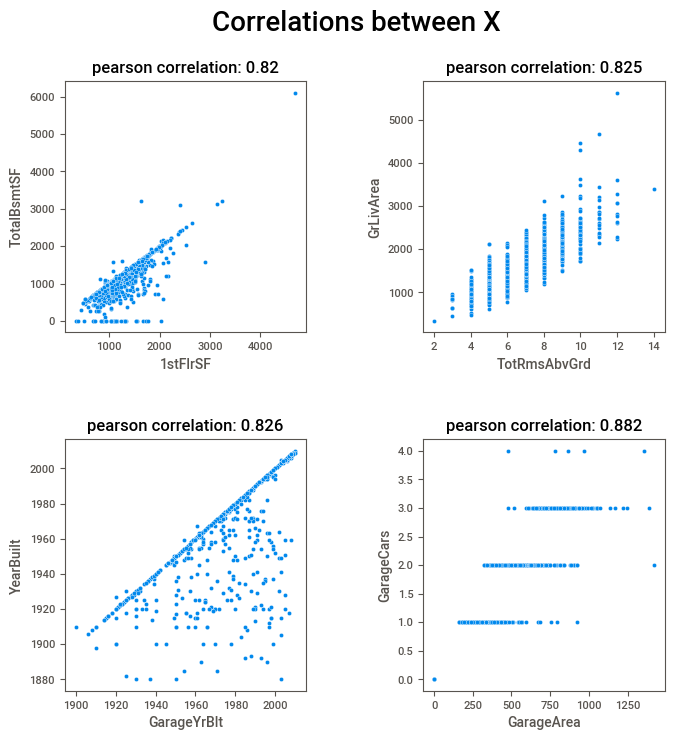

In [ ]:
corr_without_y = corr.drop(["SalePrice"], axis=1)
corr_without_y = corr_without_y.drop(["SalePrice"], axis=0)
similar_pairs = []
pearson_score = []

for feature in corr_without_y:
  positive_correlated_y = corr_without_y[feature][(corr_without_y[feature] > 0.7) & (corr_without_y[feature] != 1.0)]
  negative_correlated_y = corr_without_y[feature][(corr_without_y[feature] < -0.7) & (corr_without_y[feature] != 1.0)]

  if len(positive_correlated_y) > 0:
      positive_pairs = [(feature, similar_feature) for similar_feature in positive_correlated_y.index]
      scores = [score for score in positive_correlated_y]
      similar_pairs = similar_pairs+sorted(positive_pairs)
      pearson_score = pearson_score + scores
  if len(negative_correlated_y) > 0:
    negative_pairs = [(feature, similar_feature) for similar_feature in negative_correlated_y.index]
    scores = [score for score in negative_correlated_y]
    similar_pairs = similar_pairs+sorted(negative_pairs)
    pearson_score = pearson_score + scores

final_pairs = []
final_correlation_scores = []
for index_pair in range(len(similar_pairs)):
  pair_exist = False
  pair = similar_pairs[index_pair]
  for second_pair in similar_pairs[index_pair+1:]:
    if sorted(pair) == sorted(second_pair):
      pair_exist = True
      break
  if not pair_exist:
    final_pairs.append(pair)
    final_correlation_scores.append(pearson_score[index_pair])


fig, axes = plt.subplots(2, 2, figsize=(8, 8))
fig.tight_layout(pad=6.0)
fig.suptitle('Correlations between X',fontsize=20, fontweight ="bold")

count_row = 0
count_col = 0
for pair_index in range(len(final_pairs)):
  pair = final_pairs[pair_index]
  score = final_correlation_scores[pair_index]
  sns.scatterplot(ax=axes[count_row, count_col], x=pair[0], y=pair[1], data=train).set_title(f'pearson correlation: {round(score,3)}')
  count_col += 1
  if count_col % 2 == 0:
    count_row +=1
    count_col = 0

We can see that there are 4 high correlated of X variables which are positive correlated. we can understand the trend line clearly and see the linear correlation

## Distributions

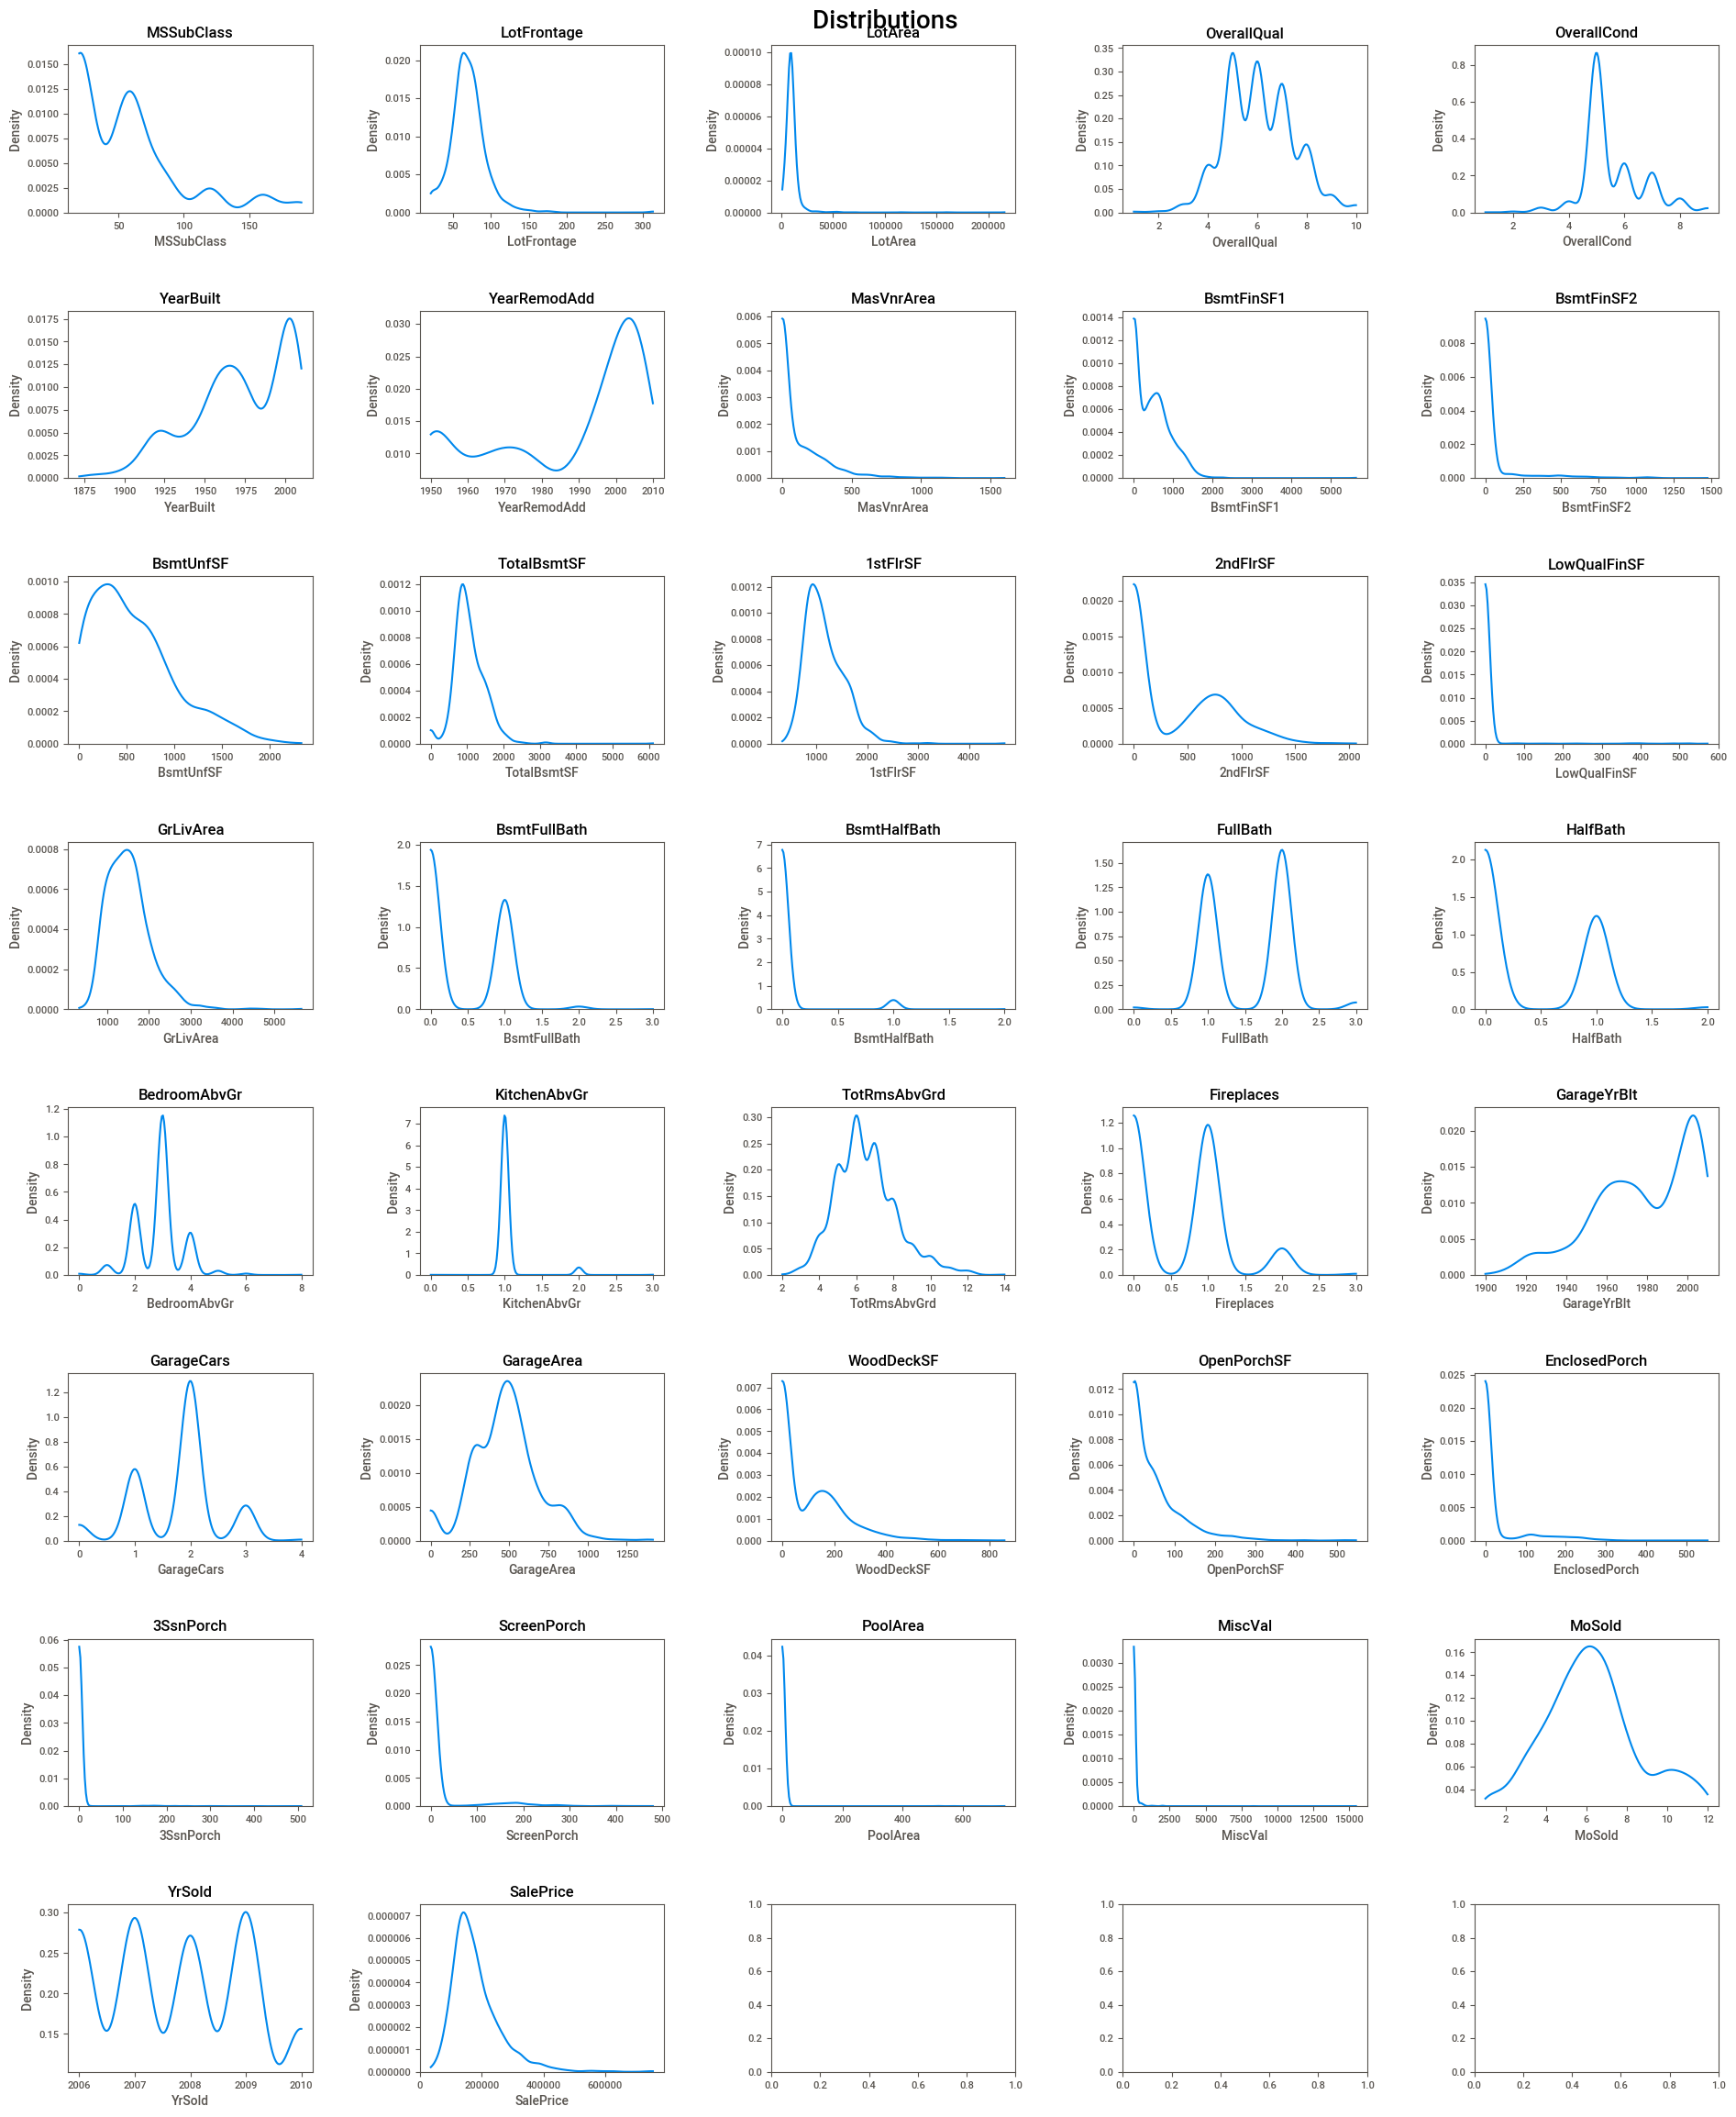

In [ ]:
np.seterr(under='ignore')
fig, axes = plt.subplots(8, 5, figsize=(20, 24))
fig.tight_layout(pad=6.0)
fig.suptitle('Distributions',fontsize=20, fontweight ="bold")

count_row = 0
count_col = 0
for feature in train_quantitative.columns[1:]:
  sns.kdeplot(ax=axes[count_row, count_col], x=feature, data=train, cut=0).set_title(feature)
  count_col += 1
  if count_col % 5 == 0:
    count_row +=1
    count_col = 0


We plot the distributions of the quantitative variables and we can see that there are devirse distributons.
There are some variables that thier distribution isn't clear - it has high peak on the beggining and then sharp decline.
We would like to look on those variables more sceficly and investigate thier box plots.

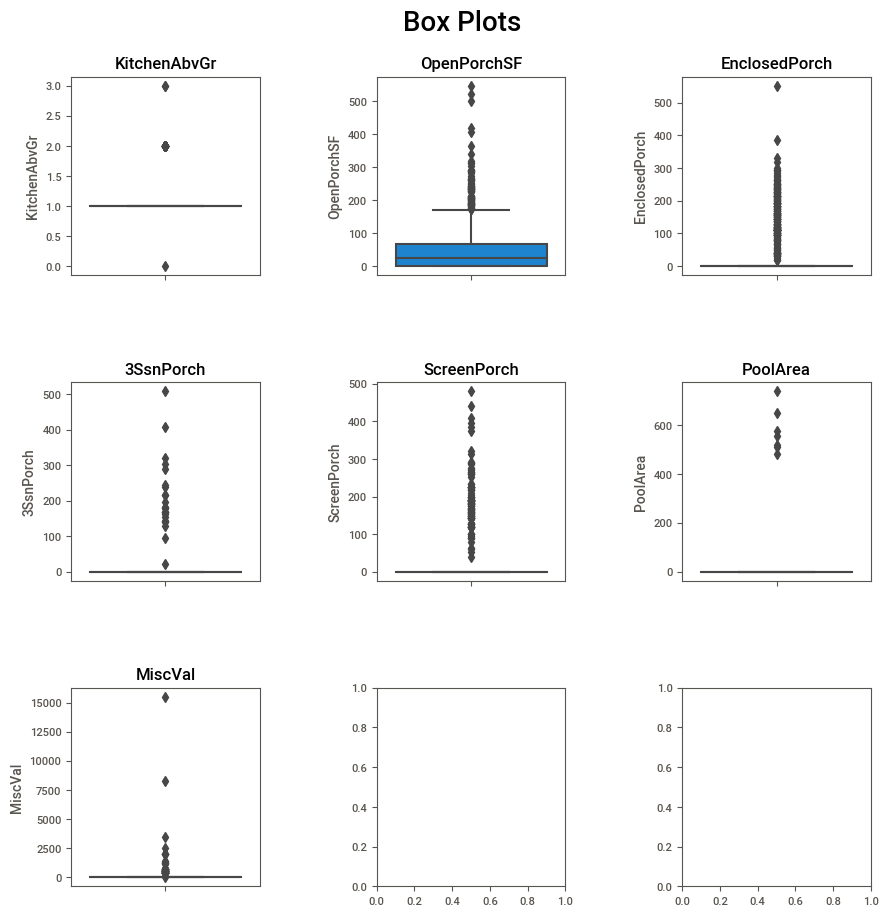

In [ ]:
abnormal_dist_indexes = np.array([22,29,30,31,32,33,34])


fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.tight_layout(pad=6.0)
fig.suptitle('Box Plots',fontsize=20, fontweight ="bold")

count_row = 0
count_col = 0
for feature_index in abnormal_dist_indexes:
  feature = train_quantitative.columns[feature_index]
  sns.boxplot(ax=axes[count_row, count_col], y=feature, data=train).set_title(feature)
  count_col += 1
  if count_col % 3 == 0:
    count_row +=1
    count_col = 0


From the box plot we can see that most of those variables are acting the same, we get a line and not even a box, it represent that the box is shrink aroud the same value- 0. Beside the most common value we can see unusual values (the dots), in some of the variables there are few irregular values and in some of them there are more.
That happends because all the houses without those properties of pool, porch and so on... gets the 0 value and the other has a numerical value. So we might consider to use only a feature that describe the propertie and if its exist or nit (binaric feature). Some of those features can help us complete the missing information in other variables, for example: use PoolArea to complete the information about PoolQC.

## PCA

In [ ]:
train_q_X = train_quantitative.loc[:, train_quantitative.columns != 'SalePrice']
train_y = train['SalePrice']

In [ ]:
scaler = StandardScaler(with_mean=True, with_std=True).fit(train_q_X)
train_q_norm = pd.DataFrame(scaler.transform(train_q_X), columns=train_q_X.columns)

pca = PCA().fit(train_q_norm.loc[:,train_q_norm.columns.difference(missing.index)])

(0.15, 1.1)

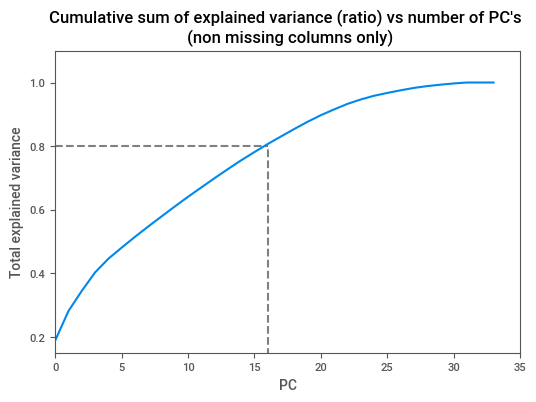

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));
plt.title("Cumulative sum of explained variance (ratio) vs number of PC's \n (non missing columns only)");
plt.xlabel('PC')
plt.ylabel('Total explained variance');
plt.hlines(0.8, xmin=0, xmax=16,color='gray', linestyle='--')
plt.vlines(16,0,0.8, color='gray', linestyle='--')
ax = plt.gca()
ax.set_xlim([0,35])
ax.set_ylim([0.15, 1.1])

For these non-missing quantitative columns, it seems that the explained variance is not plateauing very fast, but we can nontheless reduce the dimensionality by taking about 15-16 of the first PC's and they will explain 80% of the variance.

## t-SNE visualization

For visualization purposes, its helpful to reduce the data to a two dimensional plane:

In [ ]:
X_reduced = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(train_q_norm.loc[:,train_q_norm.columns.difference(missing.index)])

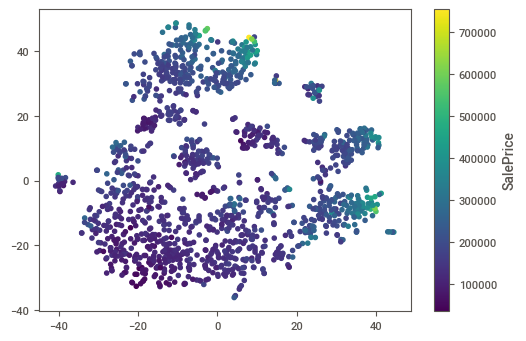

In [ ]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=train_y)
plt.colorbar(label="SalePrice")

This is actualy encouraging. The expensive houses (yellowish colors) are not dispersed all over the plane, but located in approximately 4 locations with high density. This shows that the data is somewhat seperable, at least for the most expensive houses.